In [5]:
import numpy as np
import matplotlib.pyplot as plt

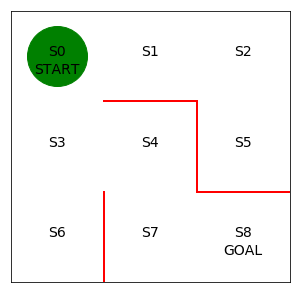

In [6]:
fig = plt.figure(figsize=(5,5))
ax = plt.gca()

#draw walls
plt.plot([1,1], [0,1], color='r', linewidth=2)
plt.plot([1,2], [2,2], color='r', linewidth=2)
plt.plot([2,2], [2,1], color='r', linewidth=2)
plt.plot([2,3], [1,1], color='r', linewidth=2)

#write status
plt.text(0.5, 2.5, 'S0', size=14, ha='center')
plt.text(1.5, 2.5, 'S1', size=14, ha='center')
plt.text(2.5, 2.5, 'S2', size=14, ha='center')
plt.text(0.5, 1.5, 'S3', size=14, ha='center')
plt.text(1.5, 1.5, 'S4', size=14, ha='center')
plt.text(2.5, 1.5, 'S5', size=14, ha='center')
plt.text(0.5, 0.5, 'S6', size=14, ha='center')
plt.text(1.5, 0.5, 'S7', size=14, ha='center')
plt.text(2.5, 0.5, 'S8', size=14, ha='center')
plt.text(0.5, 2.3, 'START', size=14, ha='center')
plt.text(2.5, 0.3, 'GOAL', size=14, ha='center')

ax.set_xlim(0,3)
ax.set_ylim(0,3)

plt.tick_params(axis='both', which='both', bottom=False, top=False,
                labelbottom=False, right=False, left=False, labelleft=False)

line, = ax.plot([0.5], [2.5], marker='o', color='g', markersize=60)

In [7]:
theta0 = np.array([[np.nan, 1, 1, np.nan],  #s0
                   [np.nan, 1, np.nan, 1], #s1
                   [np.nan, np.nan, 1, 1], #s2
                   [1, 1, 1, np.nan],
                   [np.nan, np.nan, 1, 1],
                   [1, np.nan, np.nan, np.nan],
                   [1, np.nan, np.nan, np.nan],
                   [1, 1, np.nan, np.nan], #s7
                   ])

In [8]:
def simplt_comvert_into_pi_from_theta(theta):
    m, n = theta.shape
    pi = np.zeros((m, n))
    for i in range(0, m):
        pi[i, :] = theta[i, :] / np.nansum(theta[i, :])
        
    pi = np.nan_to_num(pi)
    
    return pi

In [11]:
pi0 = simplt_comvert_into_pi_from_theta(theta0)
pi0

array([[0.        , 0.5       , 0.5       , 0.        ],
       [0.        , 0.5       , 0.        , 0.5       ],
       [0.        , 0.        , 0.5       , 0.5       ],
       [0.33333333, 0.33333333, 0.33333333, 0.        ],
       [0.        , 0.        , 0.5       , 0.5       ],
       [1.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        ],
       [0.5       , 0.5       , 0.        , 0.        ]])

In [12]:
def get_next_s(pi, s):
    direction = ['up', 'right', 'down', 'left']
    
    next_direction = np.random.choice(direction, p=pi[s, :])
    
    if next_direction == 'up':
        return s - 3
    elif next_direction == 'right':
        return s + 1
    elif next_direction == 'down':
        return s + 3
    else:
        return s - 1
    
def goal_maze(pi):
    s = 0
    state_history = [0]
    
    while True:
        next_s = get_next_s(pi, s)
        state_history.append(next_s)
        if next_s is 8:
            break
        else:
            s = next_s
    return state_history

In [13]:
state_history = goal_maze(pi0)
state_history

[0, 3, 6, 3, 0, 1, 0, 1, 2, 1, 2, 5, 2, 5, 2, 1, 0, 3, 4, 7, 8]

In [14]:
from matplotlib import animation
from IPython.display import HTML

def init():
    line.set_data([], [])
    return line,

def animate(i):
    state = state_history[i]
    x = state % 3 + 0.5
    y = 2.5 - int(state / 3)
    line.set_data(x, y)
    return line,

In [17]:
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(state_history), interval=200, repeat=False)
HTML(anim.to_jshtml())